<a href="https://colab.research.google.com/github/oymin2001/DataScience/blob/main/BFGS_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개념

## BFGS

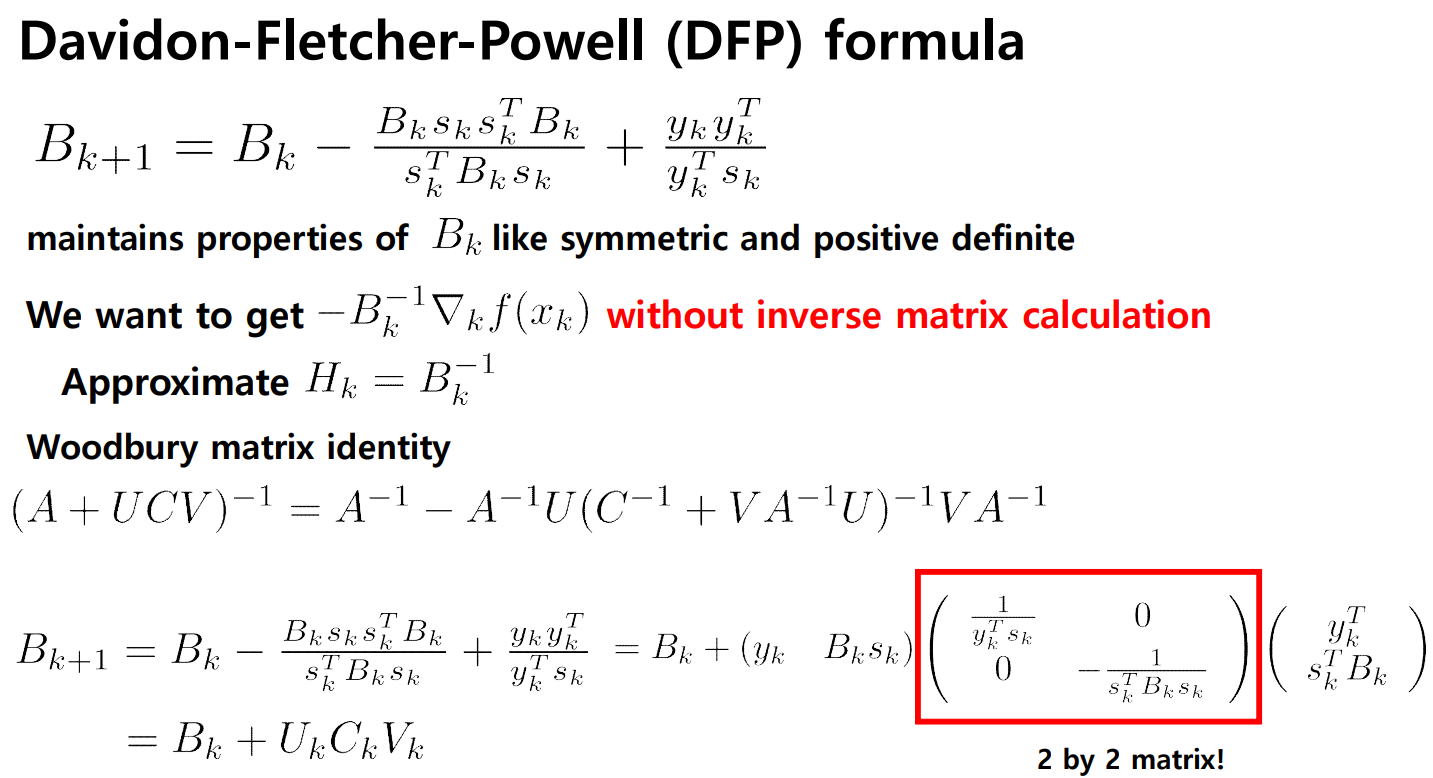

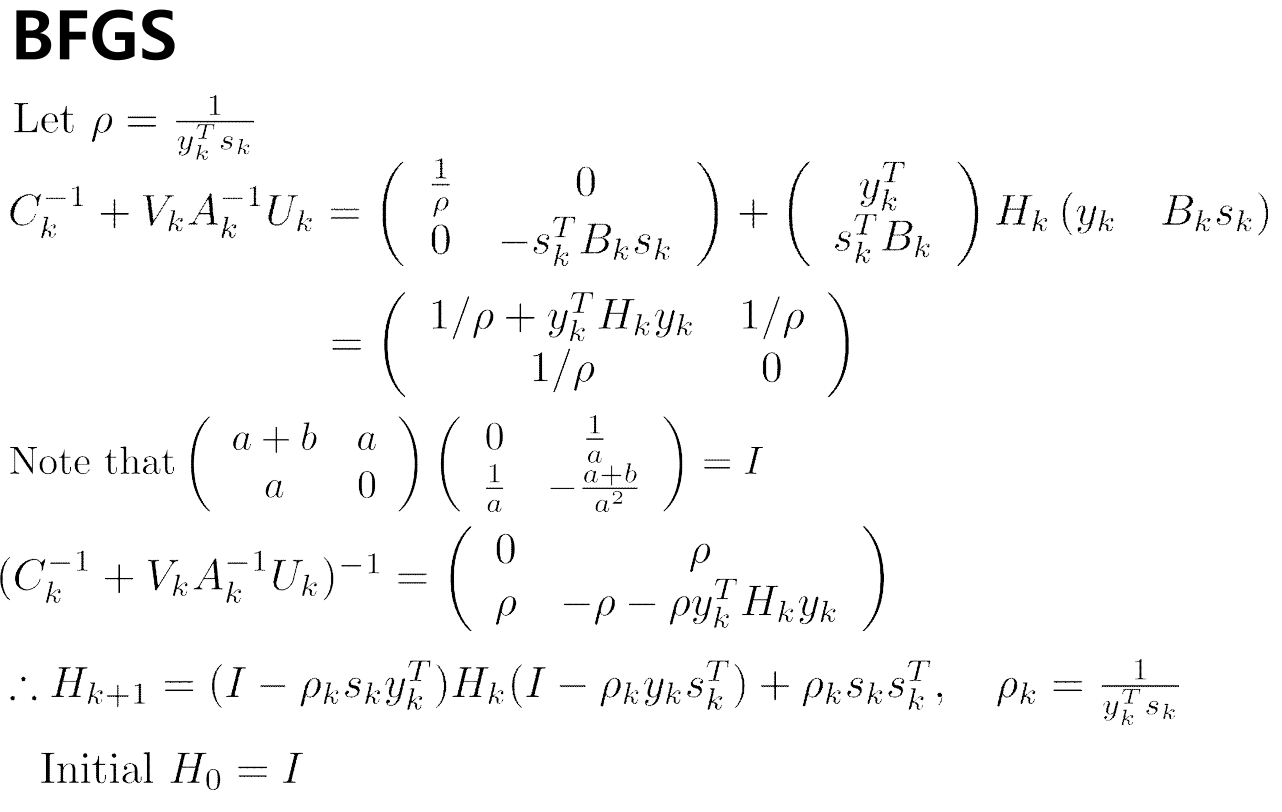

## step_size 찾기

https://en.wikipedia.org/wiki/Wolfe_conditions
$ {\displaystyle {\begin{aligned}{\textbf {i)}}&\quad f(\mathbf {x} _{k}+\alpha _{k}\mathbf {p} _{k})\leq f(\mathbf {x} _{k})+c_{1}\alpha _{k}\mathbf {p} _{k}^{\mathrm {T} }\nabla f(\mathbf {x} _{k}),\\[6pt]{\textbf {ii)}}&\quad {-\mathbf {p} }_{k}^{\mathrm {T} }\nabla f(\mathbf {x} _{k}+\alpha _{k}\mathbf {p} _{k})\leq -c_{2}\mathbf {p} _{k}^{\mathrm {T} }\nabla f(\mathbf {x} _{k}),\end{aligned}}} $

# 코드 구현

In [ ]:
import numpy as np

def line_search(f, f_grad, x, direction, alpha=1.0, beta=0.1):
    c1 = 1e-4  # Sufficient decrease parameter
    c2 = 0.9   # Curvature condition parameter

    t = alpha
    max_iterations = 100  # Maximum number of iterations
    f0 = f(x)
    f_grad_0 = f_grad(x)

    for _ in range(max_iterations):
        x_new = x + t * direction
        f_val = f(x_new)
        f_grad_val = f_grad(x_new)

        if f_val > f0 + c1 * t * f_grad_0.dot(direction):
            t /= 2
        elif f_grad_val.dot(direction) < c2 * f_grad_0.dot(direction):
            t *= 2
        else:
            return t

    return t  # Return the final step size

In [ ]:
def bfgs(f, f_grad, x0, max_iter=1000, epsilon=1e-6):
    n = len(x0)
    Hk = np.eye(n)  # Initial approximation of inverse Hessian

    for k in range(max_iter):
        xk = x0
        fk = f(xk)
        grad_fk = f_grad(xk)

        if np.linalg.norm(grad_fk) < epsilon:
            break

        pk = -np.dot(Hk, grad_fk)  # Search direction

        # Line search to determine the step size
        alpha = line_search(f, f_grad, xk, pk)

        xk_new = xk + alpha * pk
        sk = xk_new - xk
        yk = f_grad(xk_new) - grad_fk

        # Update the inverse Hessian approximation
        rho = 1.0 / np.dot(yk, sk)
        A = np.eye(n) - rho * np.outer(sk, yk)
        B = np.eye(n) - rho * np.outer(yk, sk)
        Hk = np.dot(A, np.dot(Hk, B)) + rho * np.outer(sk, sk)

        x0 = xk_new

    return x0


def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return np.array([2*x[0], 2*x[1]])

# Initial parameter estimate
x0 = np.array([1.0, 1.0])

# Run the BFGS optimizer
result = bfgs(f, grad_f, x0)

print("Optimal solution:", result)
print("Objective value:", f(result))

Optimal solution: [0. 0.]
Objective value: 0.0
